# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [1]:
import cv2 # computer vision library
import helpers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [2]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)


---
# 1. Visualize the input images


Shape of image->(469, 640, 3), label->day


Text(0.5,1,'night')

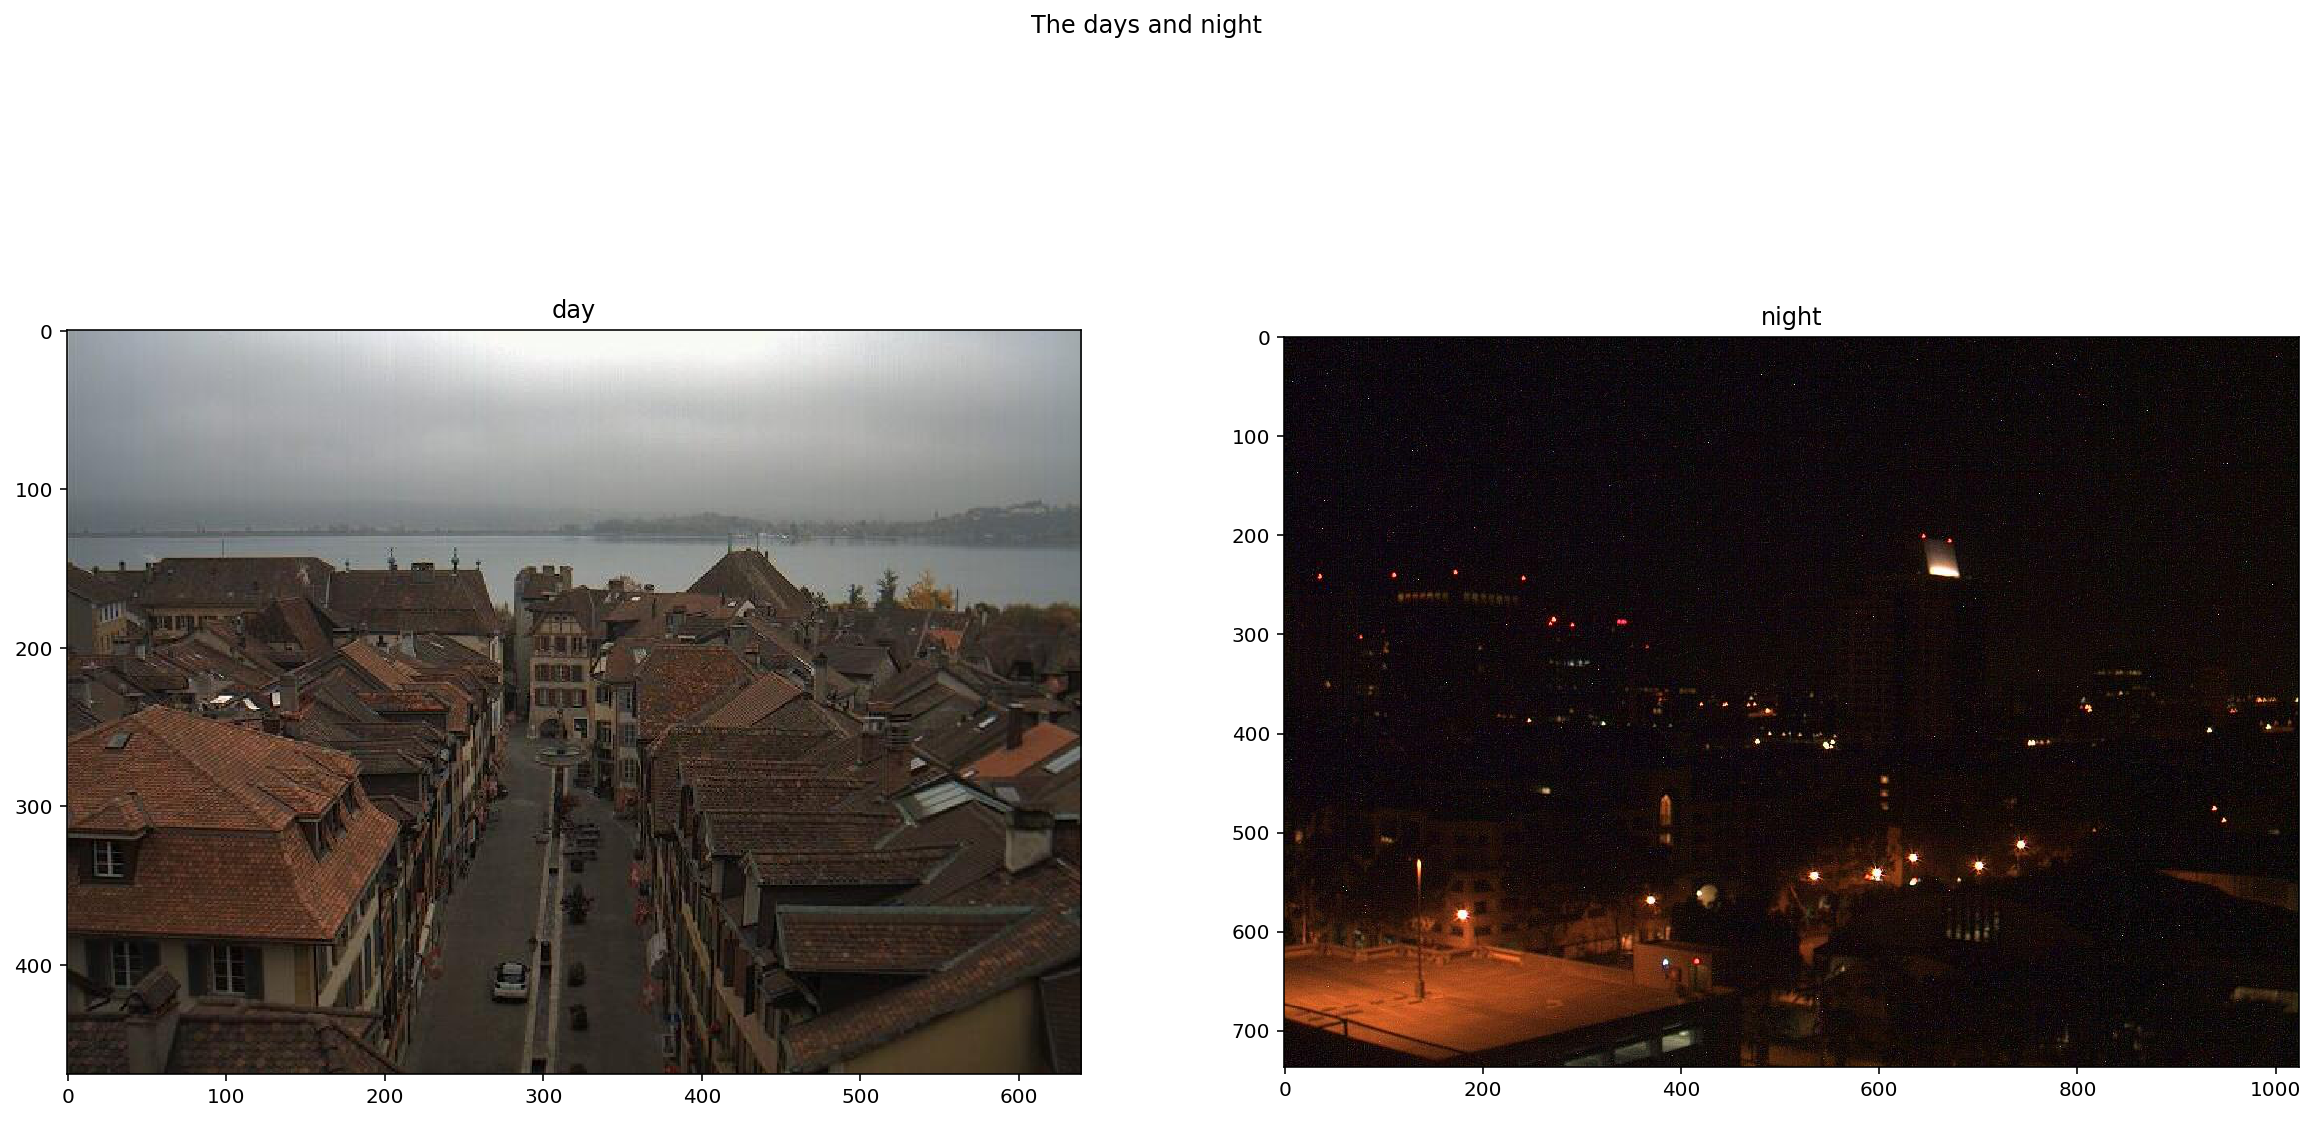

In [4]:
# Select an image and its label by list index
# [0,119] day images, [120,239] night images
image_index = 9
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

## TODO: Print out 1. The shape of the image and 2. The image's label `selected_label`
print('Shape of image->{}, label->{}'.format(selected_image.shape,selected_label))

## TODO: Display a night image
# Note the differences between the day and night images
# Any measurable differences can be used to classify these images
night_image = IMAGE_LIST[image_index+120][0]
night_label = IMAGE_LIST[image_index+120][1]

fig, (ax_day, ax_night) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('The days and night')
ax_day.imshow(selected_image)
ax_day.set_title(selected_label)
ax_night.imshow(night_image)
ax_night.set_title(night_label)

### Get the statics of the images

In [5]:
df = pd.DataFrame(None, columns=['time', 'hue', 'saturation', 'value', 'red', 'green', 'blue'])
for img, lab in IMAGE_LIST:
    copy_img = np.copy(img)
    copy_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    avg_h = copy_img[:, :, 0].mean()
    avg_s = copy_img[:, :, 1].mean()
    avg_v = copy_img[:, :, 2].mean()
    
    avg_r = img[:, :, 0].mean()
    avg_g = img[:, :, 1].mean()
    avg_b = img[:, :, 2].mean()
    dic = {
        'time':lab,
        'hue':avg_h,
        'saturation':avg_s,
        'value':avg_v,
        'red':avg_r,
        'green':avg_g,
        'blue':avg_b
    }
    df = df.append(pd.Series(dic), ignore_index=True)

In [6]:
df.head()

,time,hue,saturation,value,red,green,blue
0,day,57.706040,29.250034,137.672341,133.440843,132.395577,128.609766
1,day,101.198912,50.824929,129.147308,102.540074,116.788235,127.583471
2,day,99.069790,66.080600,200.131078,147.700055,176.113764,199.073070
3,day,86.417240,28.238127,165.407084,157.146812,158.294214,160.147912
4,day,82.941378,56.522519,191.655519,151.856392,172.126520,186.909042


In [7]:
df.groupby('time').mean()

,hue,saturation,value,red,green,blue
time,,,,,,
day,67.219861,54.330262,137.499753,121.809492,124.981593,126.814902
night,45.834447,106.235799,69.313053,67.909487,52.222858,40.951773


### Visulize the datas

time
day      AxesSubplot(0.125,0.125;0.775x0.755)
night    AxesSubplot(0.125,0.125;0.775x0.755)
Name: red, dtype: object

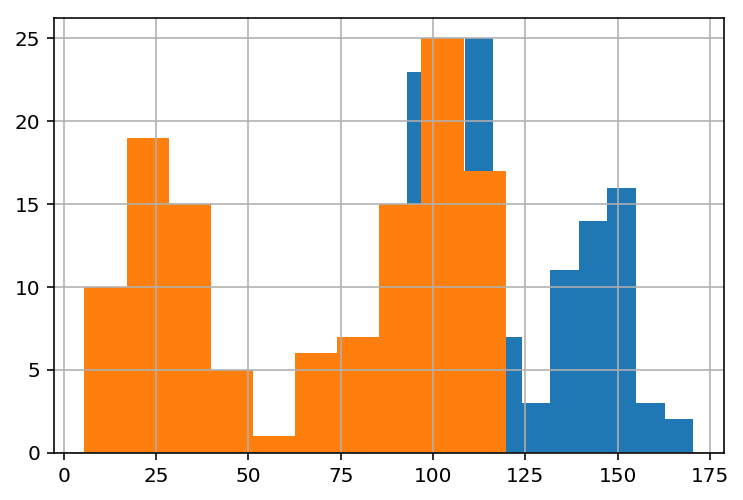

In [8]:
df.groupby('time')['red'].hist()

time
day      AxesSubplot(0.125,0.125;0.775x0.755)
night    AxesSubplot(0.125,0.125;0.775x0.755)
Name: blue, dtype: object

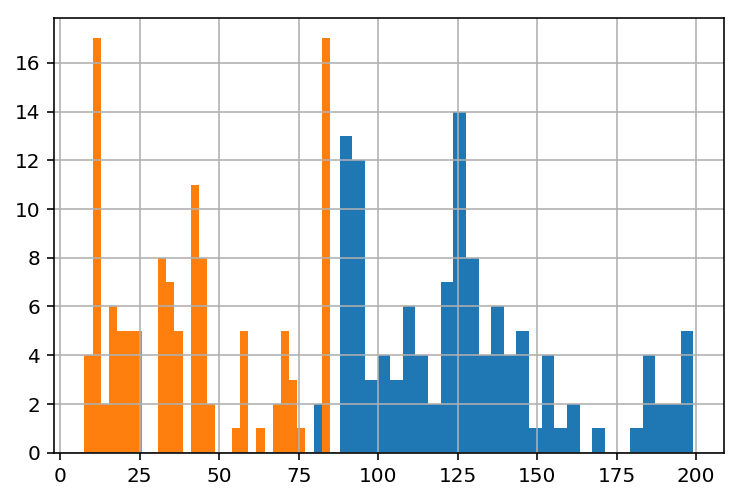

In [9]:
df.groupby('time').blue.hist(bins=30)

time
day      AxesSubplot(0.125,0.125;0.775x0.755)
night    AxesSubplot(0.125,0.125;0.775x0.755)
Name: green, dtype: object

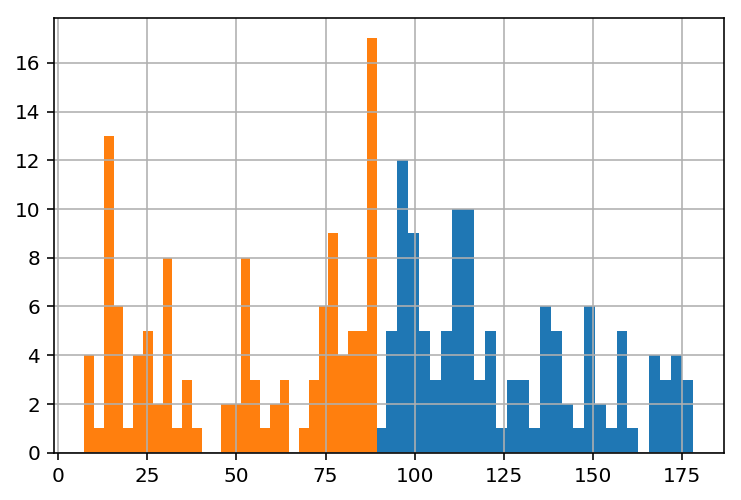

In [10]:
df.groupby('time')['green'].hist(bins=30)

time
day      AxesSubplot(0.125,0.125;0.775x0.755)
night    AxesSubplot(0.125,0.125;0.775x0.755)
Name: hue, dtype: object

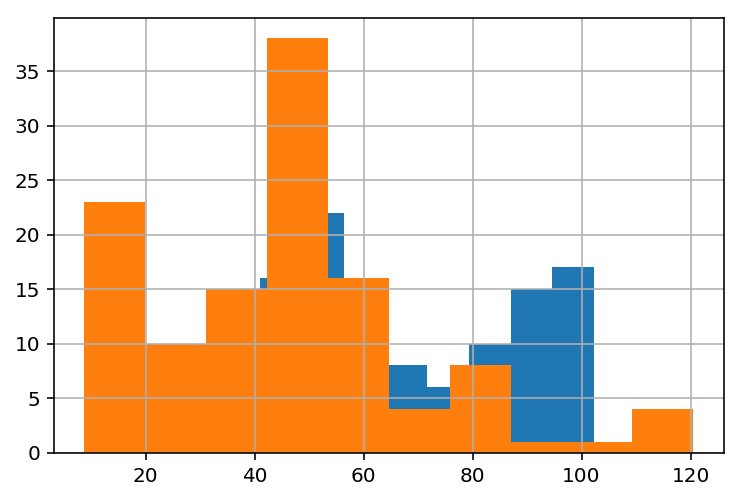

In [11]:
df.groupby('time').hue.hist()

time
day      AxesSubplot(0.125,0.125;0.775x0.755)
night    AxesSubplot(0.125,0.125;0.775x0.755)
Name: saturation, dtype: object

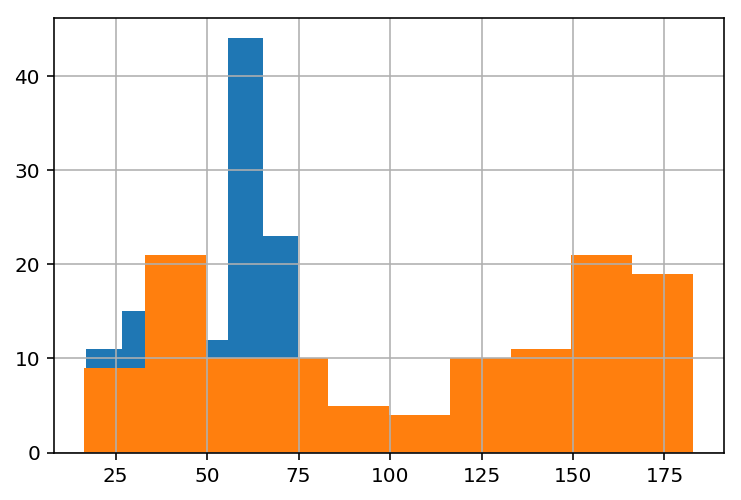

In [12]:
df.groupby('time').saturation.hist()

time
day      AxesSubplot(0.125,0.125;0.775x0.755)
night    AxesSubplot(0.125,0.125;0.775x0.755)
Name: value, dtype: object

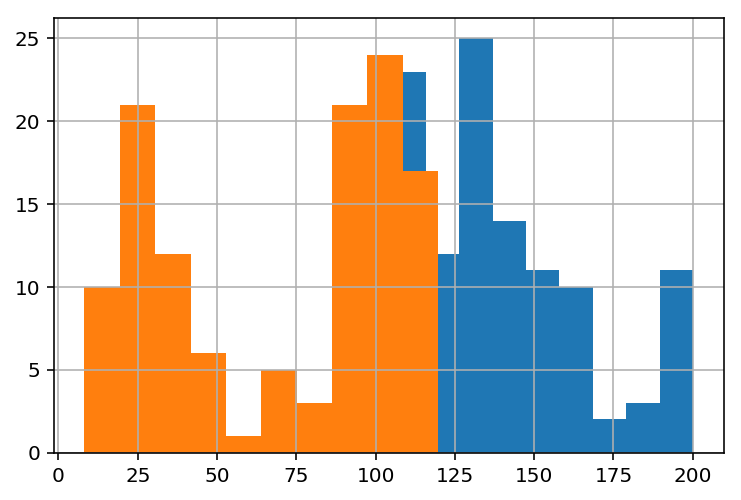

In [13]:
df.groupby('time').value.hist()

We can clearly see that the values have a distinct separated value 100,the others not has one

### try to predict the label with value

In [14]:
df['predict_hsv'] = df.apply(lambda a:'night' if a['value'] < 100 else 'day', axis=1, result_type='expand')
df['correct_hsv'] = df.time == df.predict_hsv
print("The accurate rate of predict label just by the average value of the image is %.2f%%." % (df.correct_hsv.mean()*100))

The accurate rate of predict label just by the average value of the image is 90.42%.


### with rgb

In [15]:
df['predict_rgb'] = df.apply(lambda a:'night' if (a['green'] < 88)and(a['blue'] < 88) else 'day', axis=1, result_type='expand')
df['correct_rgb'] = df.time == df.predict_rgb
print('The accurate rate of predict label by rgb %.2f%%.' % (df.correct_rgb.mean()*100))

The accurate rate of predict label by rgb 98.75%.


### Show the misclassify images

In [16]:
df.query('correct_rgb == False')

,time,hue,saturation,value,red,green,blue,predict_hsv,correct_hsv,predict_rgb,correct_rgb
9,day,36.719889,65.376069,94.695352,93.026956,85.937327,79.961754,night,False,night,False
190,night,44.634067,97.569861,119.674061,119.658802,89.446938,70.517178,day,False,day,False
205,night,29.759139,68.380543,92.775259,90.453049,89.238681,69.304216,night,True,day,False


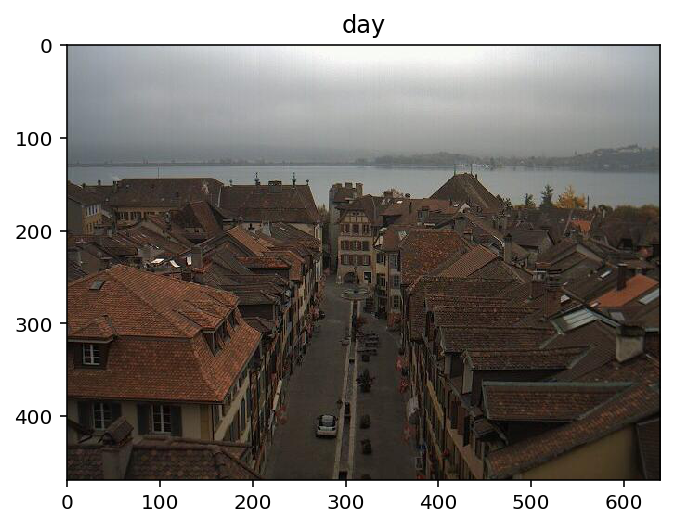

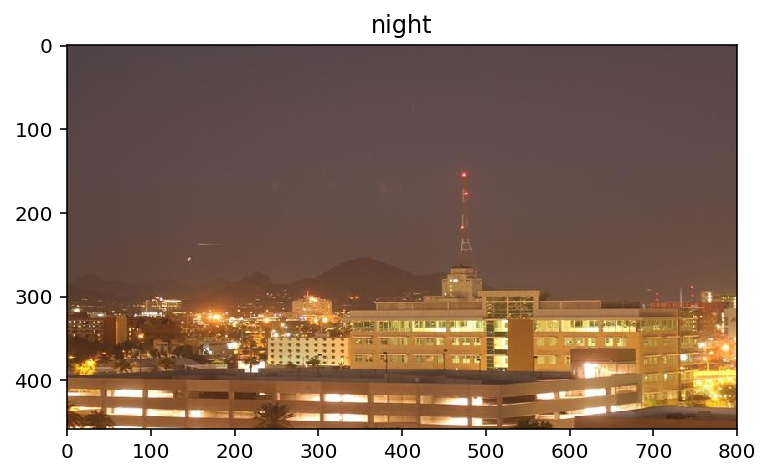

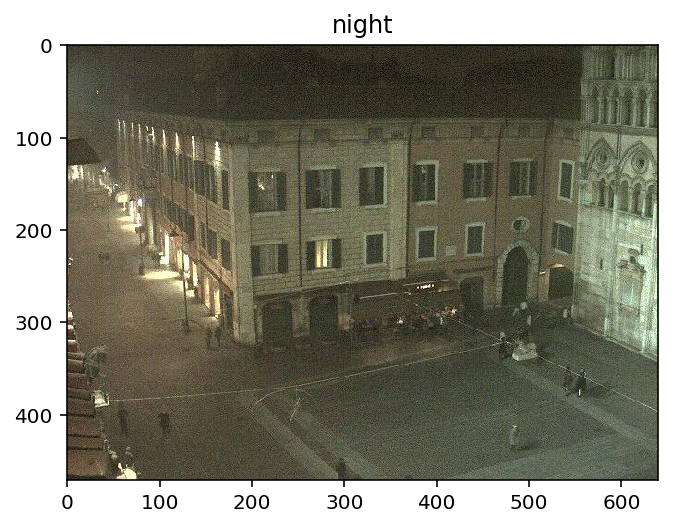

In [17]:
error_indexs = [9, 190, 205]
for i in error_indexs:
    plt.imshow(IMAGE_LIST[i][0])
    plt.title(IMAGE_LIST[i][1])
    plt.show()

### Test the accuracy with test data

In [18]:
def classifyImg(img, way = 'rgb'):
    r = img[:,:,0].mean()
    g = img[:,:,1].mean()
    b = img[:,:,2].mean()
    
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h = hsv_img[:,:,0].mean()
    s = hsv_img[:,:,1].mean()
    v = hsv_img[:,:,2].mean()
    
    if way == 'rgb':
        return 'night' if (g < 88)and(b < 88) else 'day'
    elif way == 'hsv':
        return 'night' if v < 100 else 'day'
    return None

In [20]:
IMAGE_TEST_LIST = helpers.load_dataset(image_dir_test)

predict = []
for img, lab in IMAGE_TEST_LIST:
    predict.append(classifyImg(img, 'hsv') == lab)
print('Accuracy with test data', np.array(predict).mean())

Accuracy with test data 0.925
